# Fake News Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datassist import explore, graph

## Initial Exploration

In [2]:
df_news = pd.read_csv('data/news_articles (2).csv')

In [3]:
df_news.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [4]:
df_news.shape

(2096, 12)

In [5]:
explore.overview(df_news)

,NULL Count,NULL %,Unique Items,Type
author,0,0.0,491,object
published,0,0.0,2006,object
title,0,0.0,1784,object
text,46,2.2,1941,object
language,1,0.0,5,object
site_url,1,0.0,68,object
main_img_url,1,0.0,1229,object
type,1,0.0,8,object
label,1,0.0,2,object
title_without_stopwords,2,0.1,1780,object


- A lot of null rows, however they are a small proportion of the data set. 
- The language column will likely be dropped so this doesn't matter - we only need to check that the text is English
- Labels has one NULL which is no good

## NULLs

In [6]:
explore.find_null_rows(df_news, columns=['language'])

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2095,Eddy Lavine,2016-10-28T01:02:00.000+03:00,cannabis aficionados develop thca crystalline ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Started with language because it only has one NULL, however it seems that most of the features for this sample are NULL.
- This row will be dropped from the data

In [7]:
df_rows_with_nulls = explore.find_null_rows(df_news)

In [8]:
df_rows_with_nulls.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
374,Daniel Haiphong,2016-11-17T02:00:00.000+02:00,won now what,the syrian army and hezbollah resistance force...,english,ahtribune.com,http://ahtribune.com/images/media/Donald_Trump...,bs,Fake,NaN,syrian army hezbollah resistance forces contin...,1.0
2046,-NO AUTHOR-,2016-10-27T03:05:07.528+03:00,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,english,wnd.com,No Image URL,bias,Real,hillarys emails might missing,NaN,1.0
2047,Jerome R. Corsi,2016-10-27T03:05:08.609+03:00,youtube bans clintons black son,skype sex scam a fortune built on shame moroc...,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_shock...,bias,Real,hillarys emails might missing,NaN,1.0
2048,Leo Hohmann,2016-10-27T03:12:09.534+03:00,wikileaks bombshells on hillary you need to know,posted by eddie while the skyhigh potency may ...,english,wnd.com,http://mobile.wnd.com/files/2016/10/hillary_sh...,bias,Real,wikileaks bombshells hillary need know,NaN,1.0
2049,-NO AUTHOR-,2016-10-27T03:12:13.906+03:00,fascinated with sex,billion even after they are known to be keepin...,english,wnd.com,http://mobile.wnd.com/files/2015/10/Hillary-Cl...,bias,Real,fascinated sex,NaN,0.0


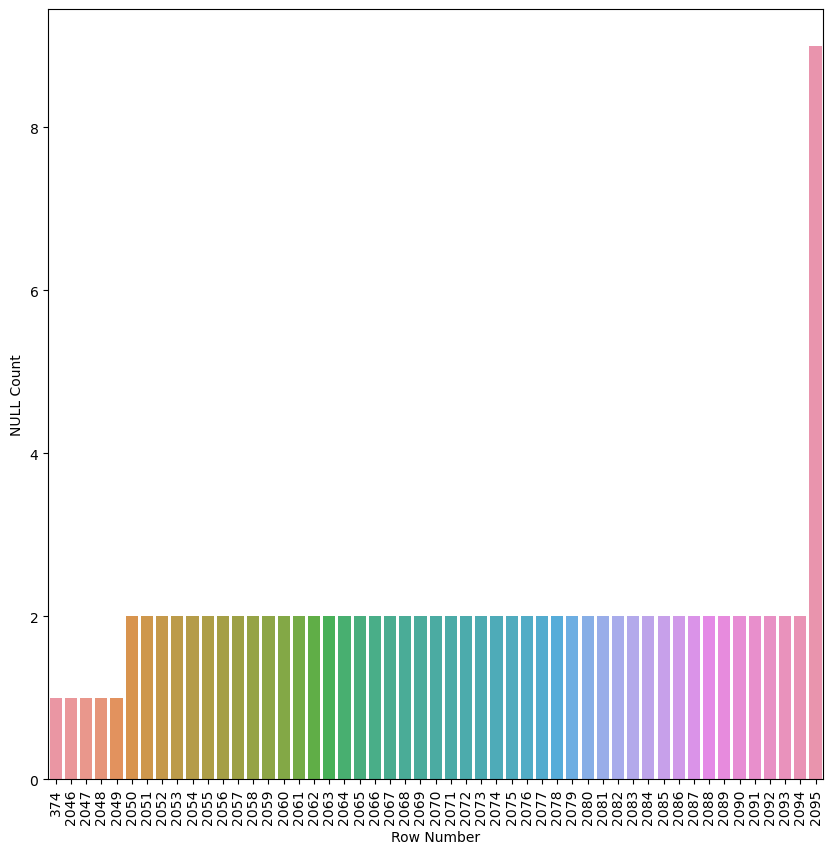

In [9]:
# Find the number of nulls per row
df_nulls_per_row = (df_news.shape[1] - df_rows_with_nulls.count(axis=1)) \
    .rename('NULL Count').to_frame() \
    .reset_index().rename(columns={'index':'Row Number'})

# Plot the results
fig = plt.figure(figsize=(10,10))
sns.barplot(data=df_nulls_per_row, x='Row Number', y='NULL Count')
plt.xticks(rotation=90)
plt.show()

- The bar chart shows that the rows typically have few NULL values (with the exception pf 2095 which will be dropped).
- It also shows that, bar 374, the NULLs are all in rows 2046 to 2095 (which is quite helpful)

In [10]:
df_rows_with_nulls.loc[2046:2094, :]

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2046,-NO AUTHOR-,2016-10-27T03:05:07.528+03:00,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,english,wnd.com,No Image URL,bias,Real,hillarys emails might missing,NaN,1.0
2047,Jerome R. Corsi,2016-10-27T03:05:08.609+03:00,youtube bans clintons black son,skype sex scam a fortune built on shame moroc...,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_shock...,bias,Real,hillarys emails might missing,NaN,1.0
2048,Leo Hohmann,2016-10-27T03:12:09.534+03:00,wikileaks bombshells on hillary you need to know,posted by eddie while the skyhigh potency may ...,english,wnd.com,http://mobile.wnd.com/files/2016/10/hillary_sh...,bias,Real,wikileaks bombshells hillary need know,NaN,1.0
2049,-NO AUTHOR-,2016-10-27T03:12:13.906+03:00,fascinated with sex,billion even after they are known to be keepin...,english,wnd.com,http://mobile.wnd.com/files/2015/10/Hillary-Cl...,bias,Real,fascinated sex,NaN,0.0
2050,-NO AUTHOR-,2016-10-27T03:19:40.578+03:00,hillarys emails might not be missing after all,NaN,english,wnd.com,No Image URL,bias,Real,meteor space junk rocket mysterious flash hits...,NaN,1.0
2051,-NO AUTHOR-,2016-10-27T03:32:23.580+03:00,hillarys emails might not be missing after all,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/meteor_russia...,bias,Real,democrats really stuff ballot heres answer,NaN,1.0
2052,Leo Hohmann,2016-10-27T03:32:35.039+03:00,wikileaks bombshells on hillary you need to know,NaN,english,wnd.com,http://mobile.wnd.com/files/2013/07/ballot-box...,bias,Real,men cry rape irans top quran reader,NaN,1.0
2053,-NO AUTHOR-,2016-10-27T03:32:37.291+03:00,fascinated with sex,NaN,english,wnd.com,http://mobile.wnd.com/files/2016/10/Saeed_Toos...,bias,Real,democrats really stuff ballot heres answer,NaN,1.0
2054,-NO AUTHOR-,2016-10-27T04:01:58.682+03:00,meteor space junk rocket mysterious flash hits...,NaN,english,wnd.com,http://www.wnd.com/files/2013/07/ballot-box-vo...,bias,Real,men cry rape irans top quran reader,NaN,1.0
2055,Greg Corombos,2016-10-27T04:07:06.853+03:00,did democrats really stuff ballot heres their ...,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/Saeed_Toosi.jpg,bias,Real,meteor space junk rocket mysterious flash hits...,NaN,1.0


- From examining this data, it seems that:
    1. The title and text "without_stopwords" appear that they are supposed to be the same, but with connectives (e.g. the, on, with) removed
    2. However, it seems that a lot of the "without_stopwords" features don't match their intended root (e.g. line 2045: `title`="gingrich slutshames megyn kelly" wheras `title_without_stopwords`="hillarys emails might missing"). 
    3. On all of the above samples, `text_without_stopwords` is NULL

It appears that the "without_stopwords" columns are some processed columns derived from `title` and `text`. These columns may be ignored since we should do our own processing of the text data later.

In [11]:
# clean up
del df_nulls_per_row
del df_rows_with_nulls

Check the without_stopwords columns match their root

In [12]:
# for each row in a df
# compare that all the words in title_without_stopwords appear in title
# save the rows where this is not true

df_news['title_different'] = np.zeros(df_news.shape[0], dtype=int)

# check that the words in title_without_stopwords appear in title
def find_different_titles(row):
    # check for NaNs
    if row['title_without_stopwords'] is np.nan:
        row['title_different'] = 1
        return row
    # check for empty strings
    if row['title_without_stopwords'] == '':
        row['title_different'] = 1
        return row
    # check for different
    for word in row['title_without_stopwords']:
        if word.strip() not in row['title']:
            row['title_different'] = 1
            break
    return row

df_news = df_news.apply(find_different_titles, axis=1)


In [13]:
df_news['title_different'].sum()

1061

There are a lot of mismatched titles in the dataset

In [14]:
df_news[df_news['title_different'] == 1].loc[848:858, ['title', 'title_without_stopwords']]

,title,title_without_stopwords
848,hate,billion dollars jewish lobby tip iceberg
849,dr duke mark collett to the antiwhite scum wh...,dr duke farren shoaf republican party coming z...
850,billion dollars for the jewish lobby just the ...,dont want break families encourage unaccompani...
851,dr duke farren shoaf we are the republican pa...,greatest mass murderers time jews says jewish ...
852,if they dont want to break up families why do ...,httpsyoutubebfpfcy_bsm
853,the greatest mass murderers of all time were j...,national bugle radio first step towards overth...
854,httpsyoutubebfpfcy_bsm,dr duke andrew anglin true voice republican party
855,national bugle radio the first step towards ov...,dr duke pastor dankof trumps america first for...
856,dr duke andrew anglin the true voice of the r...,tulsi gabbard secretary state example need pol...
857,dr duke and pastor dankof on trumps america fi...,dr duke lauds white hero richard spencer npi t...


- From looking at this slice of the data, it appears that the title and title_without_stopwords samples are misaligned
- This could be fixed in the dataset but there is little value since the *_without_stopwords columns will be dropped

## Unique Items

### Author

In [15]:
df_news['author'].unique()

array(['Barracuda Brigade', 'reasoning with facts', 'Fed Up', 'EdJenner',
       'No Author', 'Shawn Helton', 'Mike Rivero', 'Branko Mali',
       'Jimmy Rustling', 'tokyowashi (noreply@blogger.com)', 'Anonymous',
       'pak alresky', 'Steve smith', 'David Howard', 'Joseph Olson',
       'neoholographic', 'Peeple', 'PraetorianAZ', 'seentoomuch',
       'vlawde', 'apoc36', 'theantediluvian', 'reldra', 'Kali74',
       'recrisp', 'Profusion', 'sanitizedinfo', 'The angel of light',
       'darkbake', 'willz', 'jedi_hamster', 'PrairieShepherd', 'SyxPak',
       'matafuchs', 'Bloodydagger', 'Xcathdra', 'gortex', 'ssenerawa',
       'Encryptor', 'bryan2006', 'ghostrager', 'frenchfries',
       'Paradoxroutine', 'SoulOfCeres', 'gariac', 'xuenchen', 'Hefficide',
       'childoffather', 'Gandalf77', 'Kantzveldt', 'greg302',
       'WindCharger', 'crazyewok', 'TrueBrit', 'beeeyotch', 'Zaphod58',
       'CriticalStinker', 'Violater1', 'carewemust', 'DaRAGE',
       'mobiusmale', 'Brandon Turbevi

- Some interesting authors here:
  - "?????? ???? ???? ?????????"
  - "Day of the Dead 2015: History, food and reflections \x96 Andrea Lawson Gray" is clearly a title and author

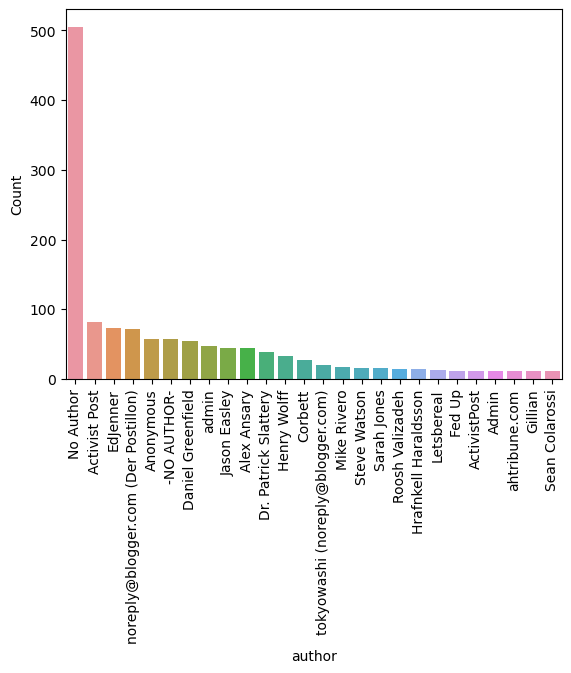

In [16]:
df_authour_count = explore.count_group(df_news, ['author']) \
    .sort_values(by='Count', ascending=False)

sns.barplot(
    data=df_authour_count[df_authour_count['Count'] > 10],
    x='author',
    y='Count'
)
# rotate x-ticks
plt.xticks(rotation=90)
plt.show()


- Some values may be combined:
  - "No Author" and "-NO AUTHOR-"
  - "Anonymous" and "?????? ???? ???? ?????????"

In [17]:
df_news['author_wordcount'] = np.zeros(len(df_news), dtype=int)

def count_words(row):
    row['author_wordcount'] = len(row['author'].split())
    return row

df_news = df_news.apply(count_words, axis=1)

In [18]:
df_news[df_news['author_wordcount'] > 3] \
    .loc[:, ['author', 'title', 'author_wordcount']]\
    .sort_values('author_wordcount', ascending=False)

,author,title,author_wordcount
1747,Game Is A Modern Rite Of Passage That Helps Tu...,comment on things indian guys have to underst...,13
314,"Day of the Dead 2015: History, food and reflec...",comment on halloween in the castro returns in ...,13
1792,4 Goals For The Neomasculinity Movement During...,comment on are you on pace to reach your goals...,10
1807,An Infographic Showing What Male Privilege Rea...,comment on the myth of male privilege by an in...,9
1726,The Most Important Concepts The Manosphere Tau...,comment on reasons why your diet sucks by the...,8
1808,How Effective Are Books On Fitness?,comment on why you should become a minimalist ...,6
1752,WATCH: My Summer Vacation In Croatia,comment on tips for having sex with croatian ...,6
1370,"Ethan A. Huff, staff writer",jimmy johns owner spent k to trophy hunt extre...,5
1344,"Ethan A. Huff, staff writer",experimental gm crops from dow chemical and du...,5
1389,"Ethan A. Huff, staff writer",americans health deteriorating under obamacare...,5


In [19]:
df_news.loc[1747, :]

author                     Game Is A Modern Rite Of Passage That Helps Tu...
published                                      2016-11-03T02:26:51.256+02:00
title                      comment on  things indian guys have to underst...
text                       how the camp of the saints predicted the migra...
language                                                             english
site_url                                                   returnofkings.com
main_img_url                                                    No Image URL
type                                                                    hate
label                                                                   Real
title_without_stopwords    reasons create fat control laws obesityfree zones
text_without_stopwords     like sigh every time skimread synopsis new lgb...
hasImage                                                                 0.0
title_different                                                            1

It seems as though the author column is polluted with values that aren't authors, we may ignore this in the model

In [20]:
# reset df_news labels to find an average
df_news['label'] = df_news['label'].map({'Real': 0, 'Fake': 1})
# rename label to is_fake
df_news = df_news.rename(columns={'label': 'is_fake'})

In [21]:
def plot_average_fake_score(df: pd.DataFrame, column: str, show_between_1_and_0: bool = False):
    # find mean of is_fake column for a given author using groupby
    df_average_fake = df.groupby(column)['is_fake'].mean().reset_index()
    if show_between_1_and_0:
        df_average_fake = df_average_fake[(df_average_fake['is_fake'] > 0) & (df_average_fake['is_fake'] < 1)]

    # barplot
    sns.barplot(x=column, y='is_fake', data=df_average_fake.sort_values('is_fake', ascending=False))
    plt.title('Average Fake News Score by Author')
    plt.xticks(rotation=90)
    plt.show()


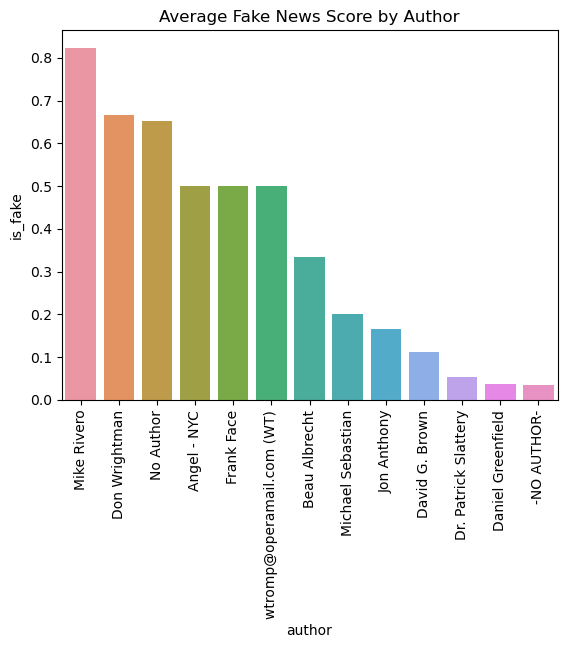

In [22]:
plot_average_fake_score(
    df_news,
    'author',
    show_between_1_and_0=True
)

In [23]:
df_news['author'].unique().shape

(491,)

- Of the 491 unique authors, only 13 have a mix of real and fake articles
- Would the author be too much of a giveaway as to whether an article is real or fake?

#### Summary of thoughts on the author feature
1. There are a lot of unique values: 
    - For a classical ML classifier model:
      - One-hot encoding this feature would make the input size excessively big
      - This would likely lead to the model overfitting
2. The majority of authors publish articles that are exclusively real or fake
    - This again could lead a model to overfit based on this feature
3. Many of the values are invalid, and sorting through them may be painstaking work

Ultimately, I think this column should not be included in the model input (at least, not initially)

### Type

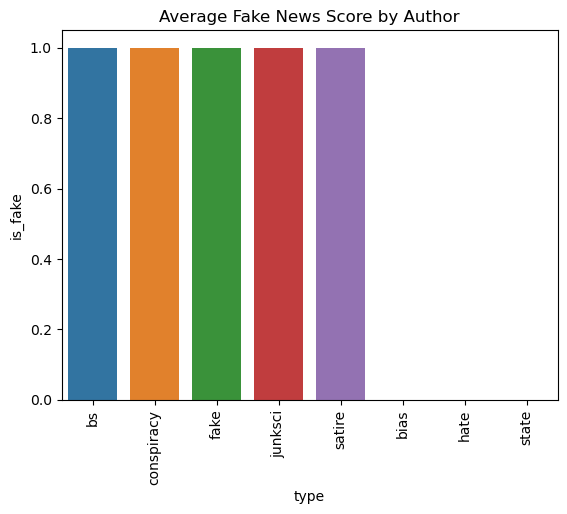

In [24]:
plot_average_fake_score(
    df_news,
    'type'
)

- Well... there's a value called *fake* here... interesting
- Similarly to the "author" column, "type" seems to leak to much information about the label

### Site URL

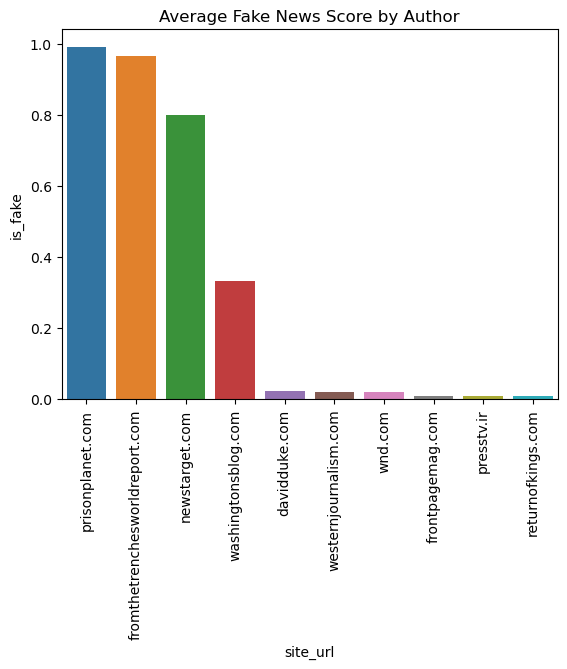

In [25]:
plot_average_fake_score(
    df_news,
    'site_url',
    show_between_1_and_0=True
)

In [26]:
df_news['site_url'].unique().shape

(69,)

- Again, there are a lot of columns which would increase the feature size for a classical model.
- The sites may also leak information about the label if they are so biased

### Language

In [27]:
df_news['language'].unique()

array(['english', 'ignore', 'german', 'french', 'spanish', nan],
      dtype=object)

In [28]:
explore.count_group(df_news, ['language'])

,language,Count
0,english,2017
1,french,2
2,german,72
3,ignore,3
4,spanish,1


In [29]:
df_news[df_news['language'] == 'ignore']

,author,published,title,text,language,site_url,main_img_url,type,is_fake,title_without_stopwords,text_without_stopwords,hasImage,title_different,author_wordcount
848,davidduke.com,http://davidduke.com/wp-content/uploads/2014/0...,hate,httpmediaarchivesgsradionetddukemp dr duke fa...,ignore,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,0.0,billion dollars jewish lobby tip iceberg,views share remarkable articleand admissionapp...,1.0,1,1
850,Staff,2016-11-20T14:58:00.000+02:00,billion dollars for the jewish lobby just the ...,views share in a remarkable articleand admiss...,ignore,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,0.0,dont want break families encourage unaccompani...,share national bugle radio first step towards ...,1.0,1,1
855,Dr. Patrick Slattery,2016-11-22T10:47:49.603+02:00,national bugle radio the first step towards ov...,share \ntulsi gabbard for secretary of state a...,ignore,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,0.0,dr duke pastor dankof trumps america first for...,september new homes sales rise back level davi...,1.0,1,3


"ignore" values are all English

In [30]:
df_news[df_news['language'] == 'french']


,author,published,title,text,language,site_url,main_img_url,type,is_fake,title_without_stopwords,text_without_stopwords,hasImage,title_different,author_wordcount
1499,No Author,2016-11-01T09:31:48.155+02:00,presstvhezbollah shares aouns victory lebanon fm,the energy minister of iran hamid chitchian \n...,french,presstv.com,http://media.presstv.com/photo/20161026/956c0e...,state,0.0,presstvus troops could prosecuted war crimes,news bulletin rita jeptoo celebrates trophy wi...,1.0,1,2
1878,"Gordon Duff, Senior Editor",2016-10-28T21:41:33.777+03:00,is alex jones covering for trumps jewish mob t...,lying arrogant muslim marxist piece of dogsht,french,voltairenet.org,http://www.voltairenet.org/local/cache-vignett...,bs,1.0,social media censoring fbis reopened clinton e...,lies esteemed scandalous liberal muslim leader...,0.0,1,4


the "french" articles are also in English...

From examining the csv:
- German articles are indeed in German
- Spanish is also in English

### Hasimage

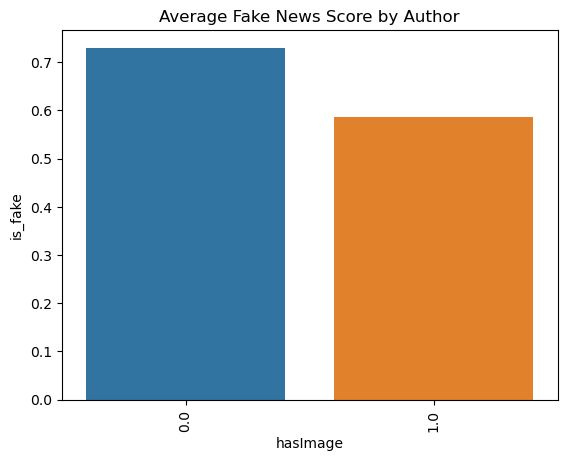

In [31]:
plot_average_fake_score(df_news, 'hasImage')

Just for fun really...

## Label Imbalance

<Axes: xlabel='is_fake', ylabel='Count'>

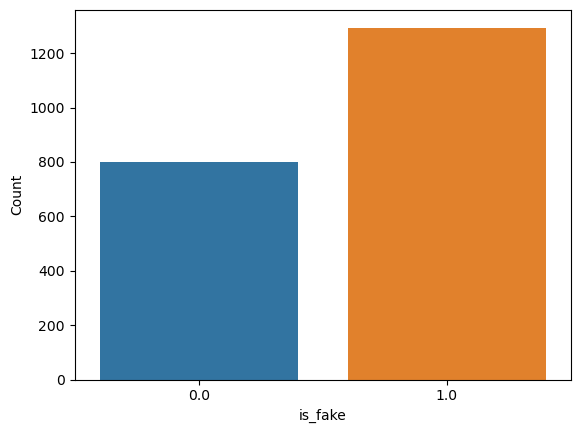

In [32]:
sns.barplot(
    data=explore.count_group(df_news, 'is_fake'),
    x='is_fake',
    y='Count'
)

The real:fake ratio looks about 2:3, not the worst

# Data Cleaning

## Operations to clean data
- Remove rows:
  - where language == "german"
  - where text or title are NULLs
- Remove columns:
  - language, *_without_stopwords, etc.
  - at this point, just keep title and text